# CS381/780 Data Analytics Final Project

### Due on 5/19/2021 23:59 pm

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [375]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [376]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,A,4,4,at_home,teacher,yes,no,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,T,1,1,at_home,other,no,yes,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,T,1,1,at_home,other,yes,no,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,T,4,2,health,services,no,yes,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,T,3,3,other,other,no,yes,yes,no,yes,no,4,3,1,2,5,10


In [377]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

In [378]:
df.describe()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,Math_FinalG3
count,396.000000,397.000000,397.000000,397.000000,397.000000,396.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.893939,1.450882,2.030227,0.332494,5.700252,10.919192,12.015113,2.748111,2.518892,3.944584,3.236776,1.483627,2.292191,3.554156,10.420655
std,4.136147,0.700455,0.840330,0.742149,7.988838,3.321359,2.418317,1.092688,1.086078,0.894400,0.997146,0.892086,1.289141,1.390885,4.571749
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,10.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,3.000000,8.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,12.000000,3.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,14.000000,4.000000,3.000000,5.000000,4.000000,2.000000,3.000000,5.000000,14.000000
max,95.000000,4.000000,4.000000,3.000000,75.000000,19.000000,18.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000


### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [379]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,A,4,4,at_home,teacher,yes,no,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,T,1,1,at_home,other,no,yes,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,T,1,1,at_home,other,yes,no,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,T,4,2,health,services,no,yes,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,T,3,3,other,other,no,yes,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 varaibles, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


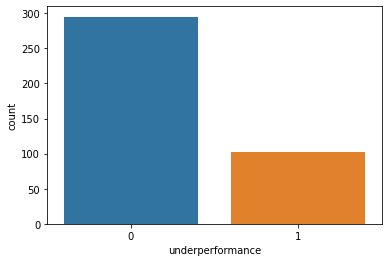

In [380]:
sns.countplot(df['underperformance'])

### Good Luck !!!

Show all your work below

Checking to see if there are any null values

In [381]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

Since there were two null values, we will be dropping the null vaules

In [382]:
df = df[~np.isnan(df['age'])]
df.isnull().any()

age                 False
traveltime          False
studytime           False
failures            False
absences            False
Math_G1             False
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

In [383]:
df.describe()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,16.893939,1.446970,2.032828,0.333333,5.714646,10.919192,12.010101,2.747475,2.520202,3.944444,3.234848,1.479798,2.287879,3.550505,0.257576
std,4.136147,0.696985,0.839791,0.742899,7.993788,3.321359,2.419310,1.093997,1.087138,0.895527,0.997667,0.889942,1.287901,1.390738,0.437852
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,10.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,12.000000,3.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,0.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,14.000000,4.000000,3.000000,5.000000,4.000000,2.000000,3.000000,5.000000,1.000000
max,95.000000,4.000000,4.000000,3.000000,75.000000,19.000000,18.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


Checking for outliers using boxplot

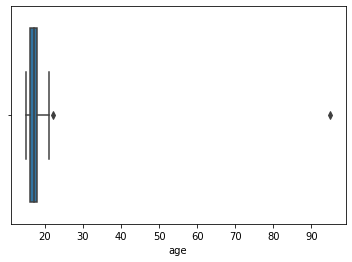

In [384]:
sns.boxplot(x = df['age'])

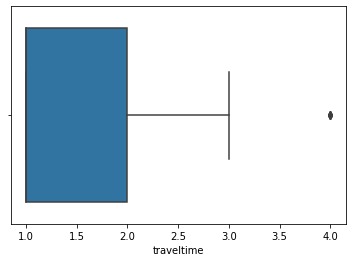

In [385]:
sns.boxplot(x = df['traveltime'])

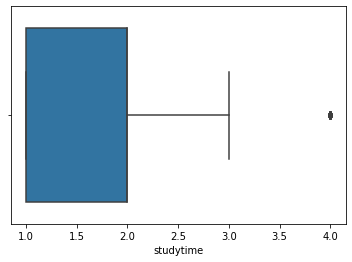

In [386]:
sns.boxplot(x = df['studytime'])

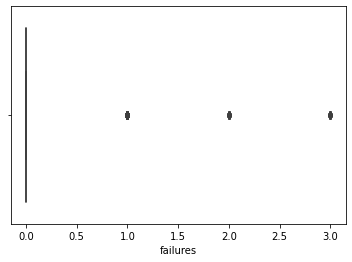

In [387]:
sns.boxplot(x = df['failures'])

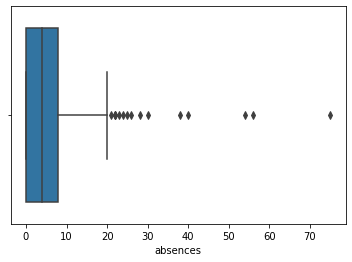

In [388]:
sns.boxplot(x = df['absences'])

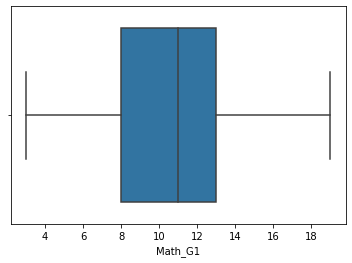

In [389]:
sns.boxplot(x = df['Math_G1'])

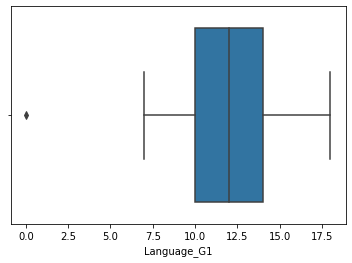

In [390]:
sns.boxplot(x = df['Language_G1'])

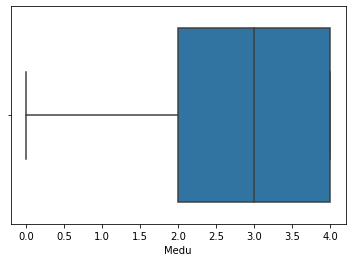

In [391]:
sns.boxplot(x = df['Medu'])

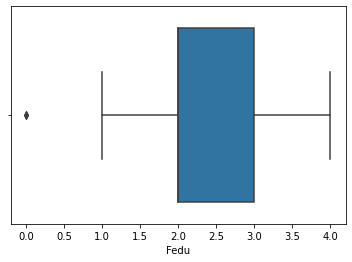

In [392]:
sns.boxplot(x = df['Fedu'])

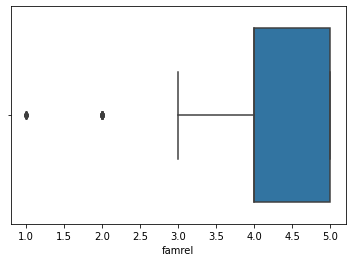

In [393]:
sns.boxplot(x = df['famrel'])

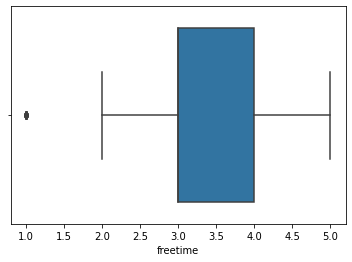

In [394]:
sns.boxplot(x = df['freetime'])

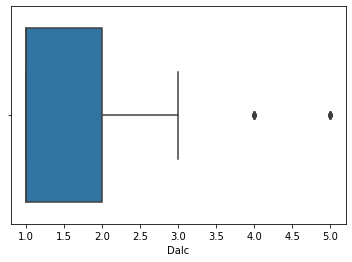

In [395]:
sns.boxplot(x = df['Dalc'])

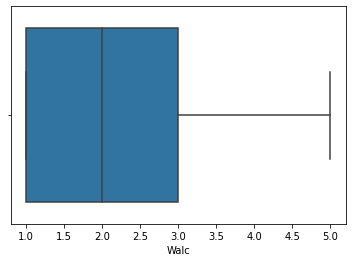

In [396]:
sns.boxplot(x = df['Walc'])

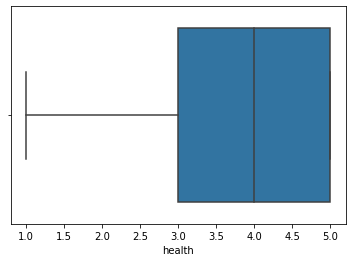

In [397]:
sns.boxplot(x = df['health'])

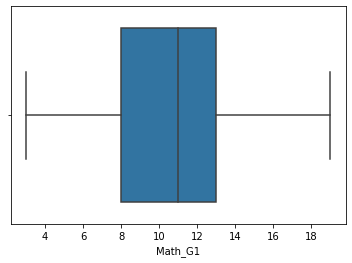

In [398]:
sns.boxplot(x = df['Math_G1'])

Removing outliers from our dataset

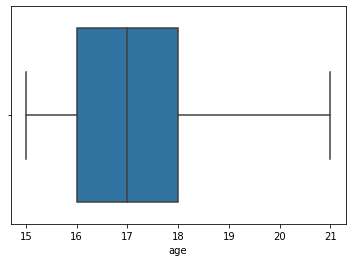

In [399]:
# Removing outliers
df = df[df['age'] < 22]
sns.boxplot(x = df['age'])

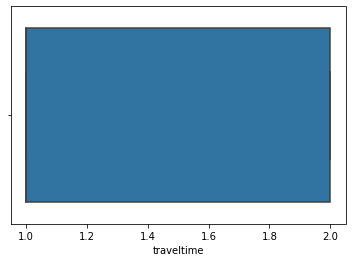

In [400]:
df = df[df['traveltime'] < 3.0]
sns.boxplot(x = df['traveltime'])

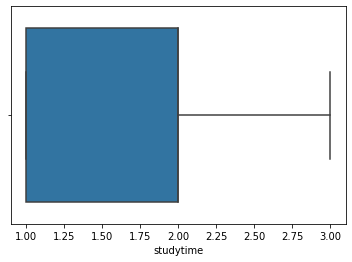

In [401]:
df = df[df['studytime'] < 3.1]
sns.boxplot(x = df['studytime'])

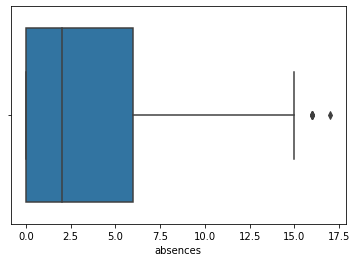

In [402]:
df = df[df['absences'] < 18]
sns.boxplot(x = df['absences'])

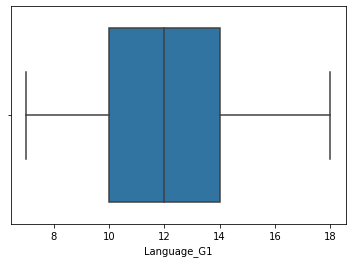

In [403]:
df = df[df['Language_G1'] != 0]
sns.boxplot(x = df['Language_G1'])

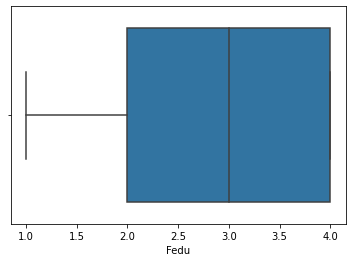

In [404]:
df = df[df['Fedu'] != 0]
sns.boxplot(x = df['Fedu'])

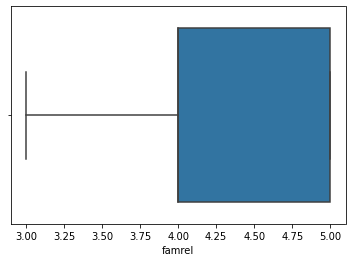

In [405]:
df = df[df['famrel'] > 2.9]
sns.boxplot(x = df['famrel'])

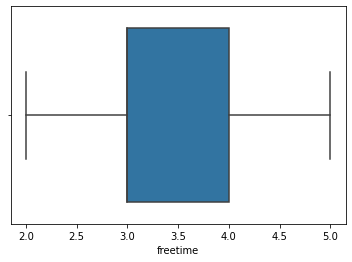

In [406]:
df = df[df['freetime'] != 1.0]
sns.boxplot(x = df['freetime'])

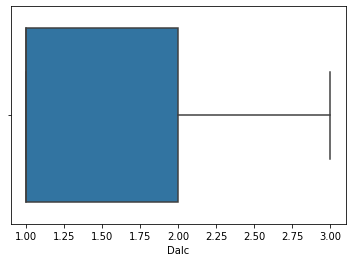

In [407]:
df = df[df['Dalc'] < 3.9]
sns.boxplot(x = df['Dalc'])

**Visulization of our data**

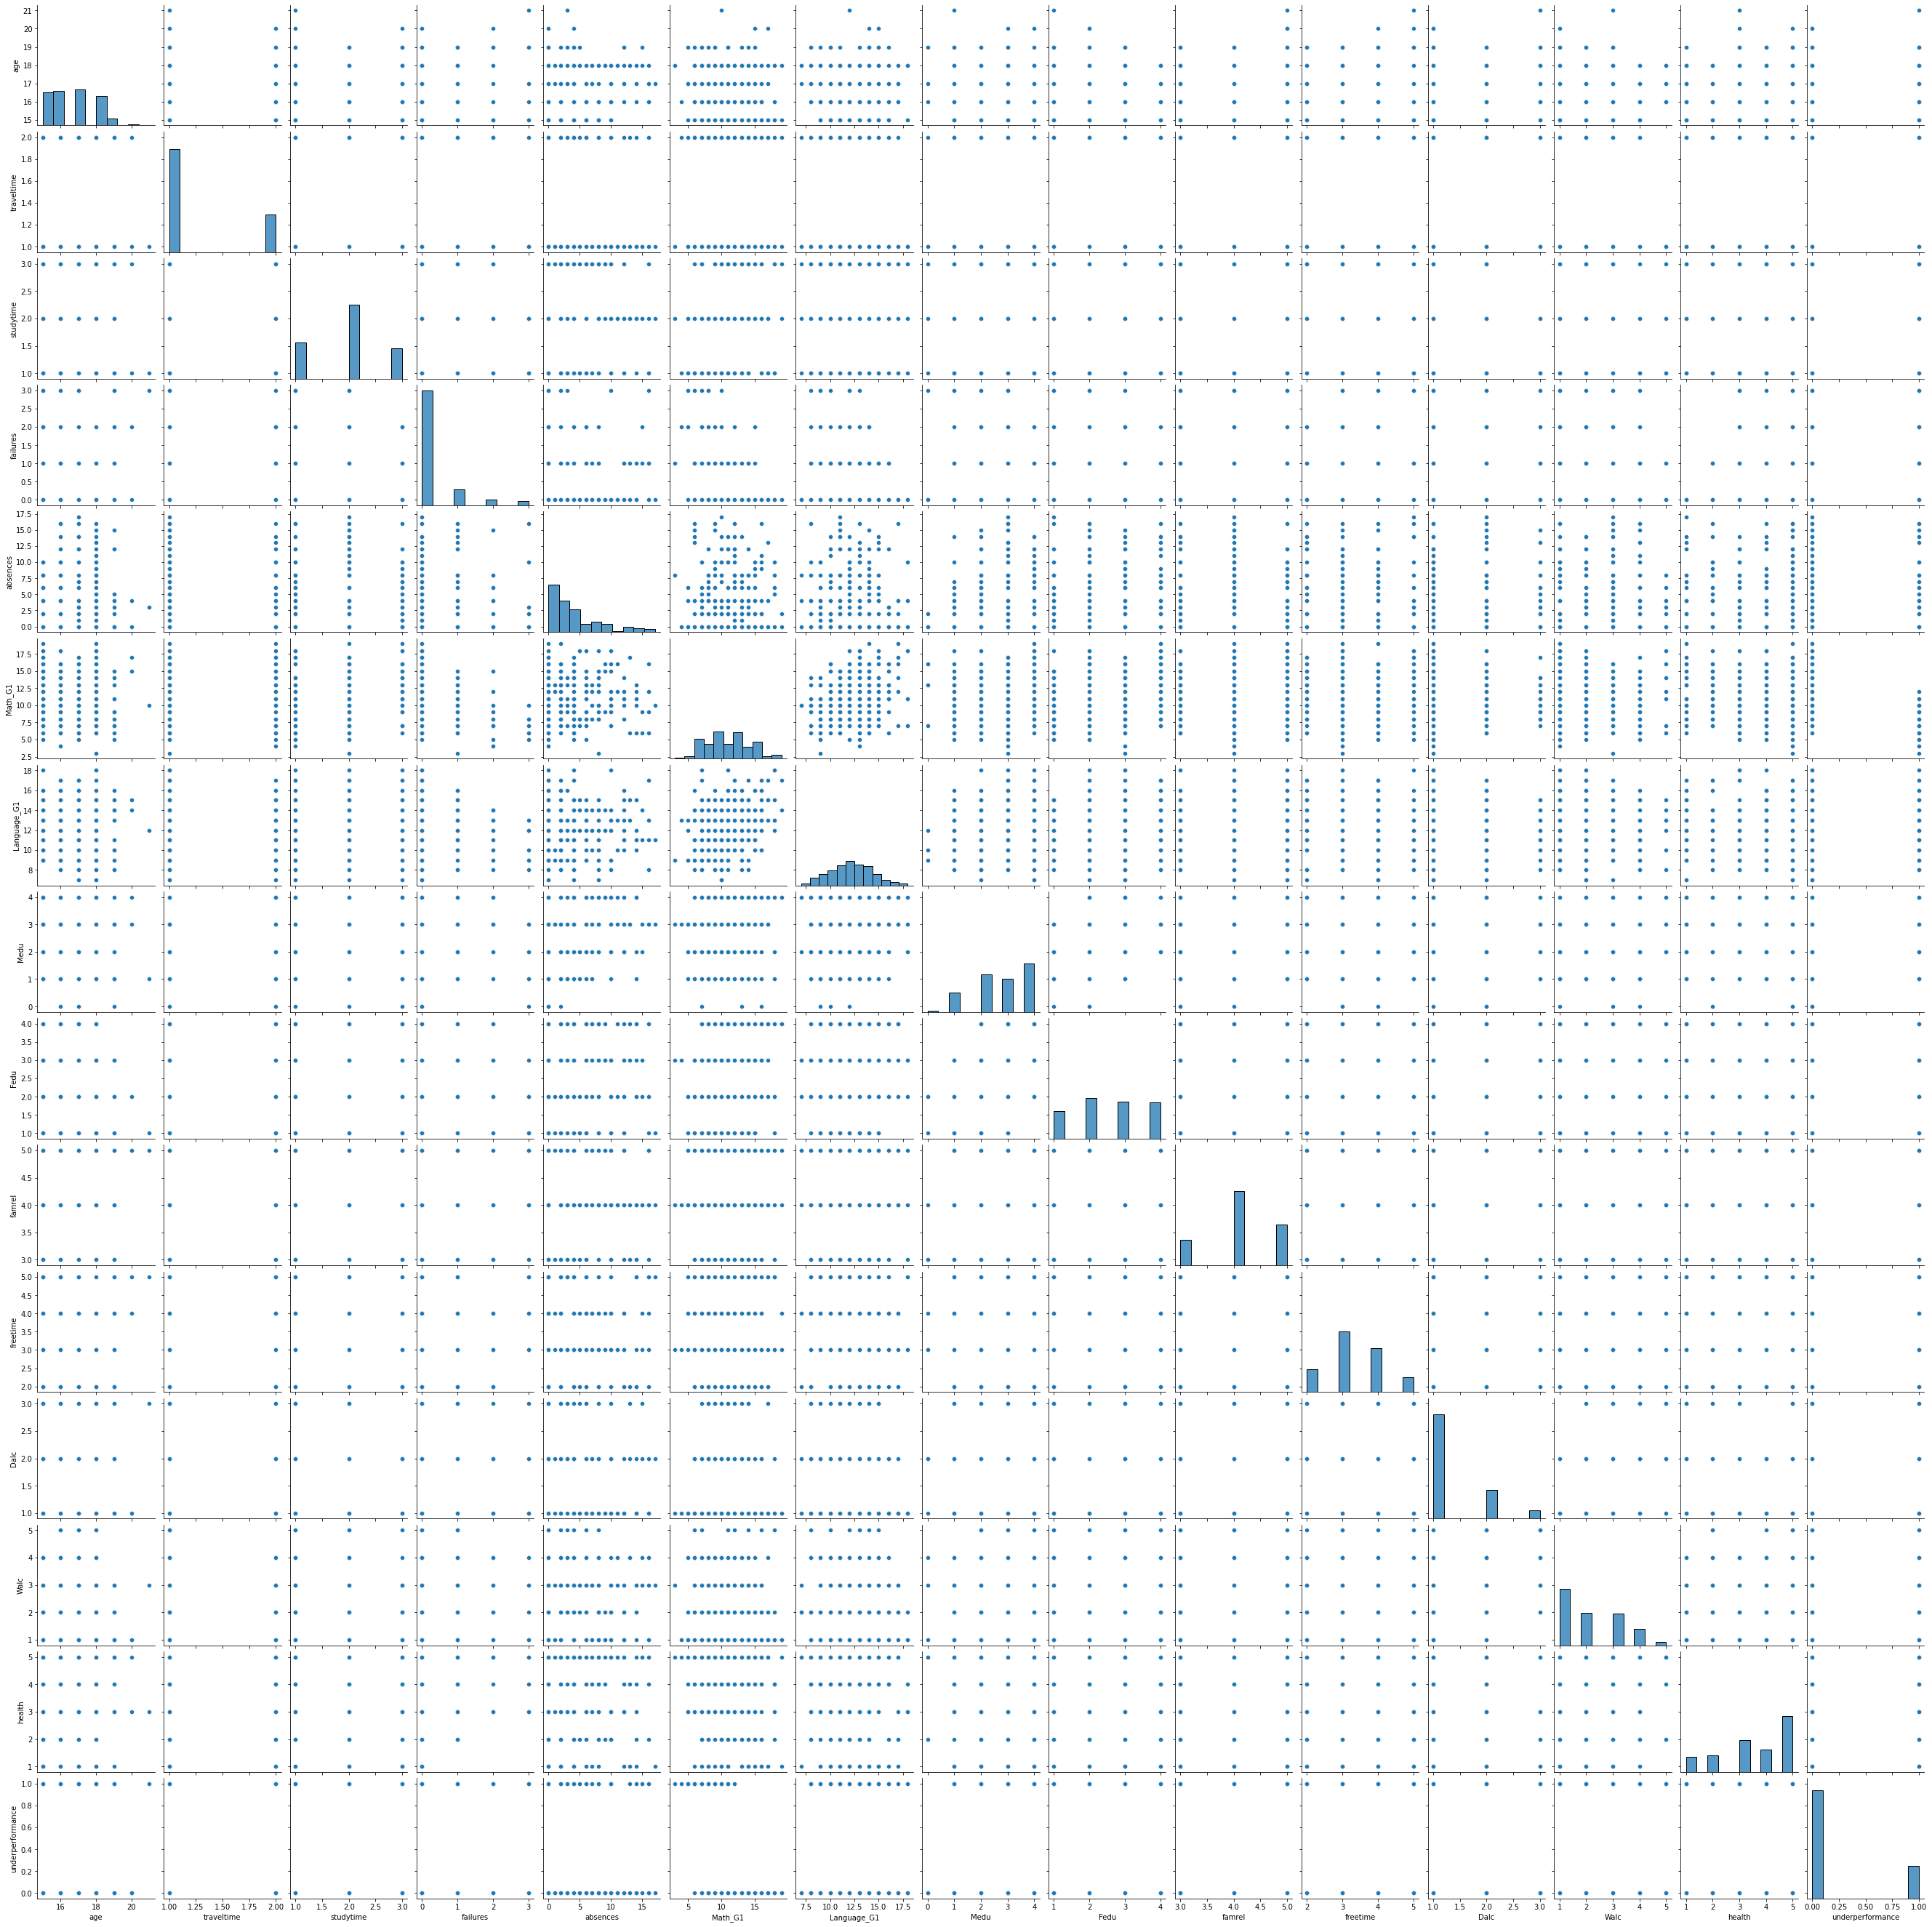

In [445]:
sns.pairplot(data = df, kind = 'scatter')

In [409]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
age,1.000000,0.112285,0.112013,0.204890,0.157365,-0.107978,-0.010047,-0.188756,-0.229223,0.047106,-0.001064,0.096974,0.104797,-0.053486,0.134113
traveltime,0.112285,1.000000,-0.049650,0.082230,-0.070798,-0.035501,-0.062043,-0.102290,-0.094435,-0.046550,0.012589,-0.043696,-0.004671,-0.046796,0.047954
studytime,0.112013,-0.049650,1.000000,-0.129847,-0.022423,0.167883,0.073594,0.100799,0.052834,0.073367,-0.125018,-0.154019,-0.182758,-0.063447,-0.096067
failures,0.204890,0.082230,-0.129847,1.000000,0.058472,-0.359328,-0.126063,-0.216186,-0.239018,-0.066654,0.133075,0.162459,0.057765,0.126699,0.388306
absences,0.157365,-0.070798,-0.022423,0.058472,1.000000,0.007051,0.004041,0.090575,-0.016336,-0.036644,0.012629,0.072161,0.180081,-0.045693,-0.100303
Math_G1,-0.107978,-0.035501,0.167883,-0.359328,0.007051,1.000000,0.299193,0.242868,0.266583,0.088393,0.036544,-0.100040,-0.087105,-0.051818,-0.623757
Language_G1,-0.010047,-0.062043,0.073594,-0.126063,0.004041,0.299193,1.000000,0.126130,0.074561,-0.000228,-0.048824,-0.069359,-0.053323,-0.031952,-0.094046
Medu,-0.188756,-0.102290,0.100799,-0.216186,0.090575,0.242868,0.126130,1.000000,0.616884,0.152759,0.004373,-0.030161,-0.055299,0.010983,-0.142069
Fedu,-0.229223,-0.094435,0.052834,-0.239018,-0.016336,0.266583,0.074561,0.616884,1.000000,0.067004,-0.052068,-0.037133,-0.060908,0.034066,-0.174949
famrel,0.047106,-0.046550,0.073367,-0.066654,-0.036644,0.088393,-0.000228,0.152759,0.067004,1.000000,0.174051,-0.078118,-0.167238,0.047573,-0.099953


In [462]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

Checking for numerical values and values to dummify

In [463]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
1,17.0,1,2,0,4,5.0,9,1,1,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,1,1,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,4,2,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,3,3,4,3,1,2,5,0
5,16.0,1,2,0,10,15.0,12,4,3,5,4,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,18.0,2,3,0,2,10.0,10,2,2,5,3,1,3,4,0
388,19.0,1,3,1,0,7.0,15,2,3,5,4,1,2,5,1
389,18.0,1,2,0,0,7.0,10,3,1,4,3,1,1,1,1
393,21.0,1,1,3,3,10.0,12,1,1,5,5,3,3,3,1


**Splitting into train, test and normalizing**

In [464]:
X = newdf.drop('underperformance', axis = 1)
y = newdf['underperformance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Models**

**Linear Regression model w/ Language_G1, Math_G1**

In [465]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print(classification_report(y_test, pred))
print("accuracy score: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        39
           1       0.91      0.67      0.77        15

    accuracy                           0.89        54
   macro avg       0.90      0.82      0.85        54
weighted avg       0.89      0.89      0.88        54

accuracy score:  0.8888888888888888


In [466]:
import random
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 1000))
  currentModel = model1
  currentModel.fit(X_train, y_train)
  y_pred = currentModel.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        45
           1       0.64      1.00      0.78         9

    accuracy                           0.91        54
   macro avg       0.82      0.94      0.86        54
weighted avg       0.94      0.91      0.91        54

accuracy:  0.9074074074074074
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        34
           1       1.00      0.65      0.79        20

    accuracy                           0.87        54
   macro avg       0.91      0.82      0.85        54
weighted avg       0.89      0.87      0.86        54

accuracy:  0.8703703703703703
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.85      0.69      0.76        16

    accuracy                           0.87        54
   macro avg       0.86      0.82      0.84        54
weighted avg  

The linear regression mode including `Math_G1` and `Language_G1` had an average accuracy of $\approx$ 90%

**Cross Validation Testing for Logistic Regresstion**

In [467]:
scores = cross_val_score(model1, X_train, y_train, cv=10)
scores

array([0.90909091, 0.95454545, 0.95454545, 0.86363636, 0.90909091,
       0.9047619 , 0.80952381, 0.95238095, 0.9047619 , 0.85714286])

Since the values are close to one another, we know that this model passes cross validation

**RBF model**

In [468]:
model2 = svm.SVC(kernel='rbf', gamma=0.1)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))
print("acc: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        41
           1       1.00      0.31      0.47        13

    accuracy                           0.83        54
   macro avg       0.91      0.65      0.69        54
weighted avg       0.86      0.83      0.80        54

acc:  0.6296296296296297


In [469]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 1000))
  currentModel = model2
  currentModel.fit(X_train, y_train)
  y_pred = currentModel.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        36
           1       0.88      0.39      0.54        18

    accuracy                           0.78        54
   macro avg       0.82      0.68      0.70        54
weighted avg       0.80      0.78      0.75        54

accuracy:  0.7777777777777778
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.80      0.31      0.44        13

    accuracy                           0.81        54
   macro avg       0.81      0.64      0.67        54
weighted avg       0.81      0.81      0.78        54

accuracy:  0.8148148148148148
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        39
           1       1.00      0.60      0.75        15

    accuracy                           0.89        54
   macro avg       0.93      0.80      0.84        54
weighted avg  

**Testing Cross Validation for rbf model**

In [470]:
scores = cross_val_score(model2, X_train, y_train, cv=10)
scores

array([0.81818182, 0.90909091, 0.86363636, 0.90909091, 0.90909091,
       0.85714286, 0.80952381, 0.80952381, 0.80952381, 0.85714286])

Since the values are close to one other, this model passes cross validation

When looking at the two models, rbf and linear regression, in this case, linear regression had a higher accuracy. Rbf model had an average accuracy of $\approx$ 85% however, the linear regression model had an accuracy of $\approx$ 92%

**Model without `Math_G1` and `Language_G1`**

In [471]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
1,17.0,1,2,0,4,5.0,9,1,1,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,1,1,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,4,2,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,3,3,4,3,1,2,5,0
5,16.0,1,2,0,10,15.0,12,4,3,5,4,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,18.0,2,3,0,2,10.0,10,2,2,5,3,1,3,4,0
388,19.0,1,3,1,0,7.0,15,2,3,5,4,1,2,5,1
389,18.0,1,2,0,0,7.0,10,3,1,4,3,1,1,1,1
393,21.0,1,1,3,3,10.0,12,1,1,5,5,3,3,3,1


**Dropping `Math_G1` and `Language_G1` because we are testing our model without those variables**

In [474]:
newdf.drop(['Math_G1'], axis=1, inplace=True)
newdf.drop(['Language_G1'], axis=1, inplace=True)
newdf

,age,traveltime,studytime,failures,absences,Medu,Fedu,famrel,freetime,Dalc,Walc,health,underperformance
1,17.0,1,2,0,4,1,1,5,3,1,1,3,1
2,15.0,1,2,3,10,1,1,4,3,2,3,3,0
3,15.0,1,3,0,2,4,2,3,2,1,1,5,0
4,16.0,1,2,0,4,3,3,4,3,1,2,5,0
5,16.0,1,2,0,10,4,3,5,4,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,18.0,2,3,0,2,2,2,5,3,1,3,4,0
388,19.0,1,3,1,0,2,3,5,4,1,2,5,1
389,18.0,1,2,0,0,3,1,4,3,1,1,1,1
393,21.0,1,1,3,3,1,1,5,5,3,3,3,1


**Splitting the data into Train and Test**

In [475]:
X = newdf.drop('underperformance', axis = 1)
y = newdf['underperformance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Logistic Regression model without Math_G1 and Langauge_G1**

In [478]:
model_no_math = LogisticRegression()
model_no_math.fit(X_train, y_train)
pred = model_no_math.predict(X_test)
print(classification_report(y_test, pred))
print("accuracy score: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84        39
           1       0.67      0.13      0.22        15

    accuracy                           0.74        54
   macro avg       0.71      0.55      0.53        54
weighted avg       0.72      0.74      0.67        54

accuracy score:  0.7407407407407407


**Logistic Regression accuracy without Math_G1 and Language_G1 was 74% which was less than the accuracy for the model with Math_G1 and Language_G1**


In [479]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 1000))
  currentModel = model1
  currentModel.fit(X_train, y_train)
  y_pred = currentModel.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.67      0.55      0.60        11

    accuracy                           0.85        54
   macro avg       0.78      0.74      0.75        54
weighted avg       0.84      0.85      0.85        54

accuracy:  0.8518518518518519
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        38
           1       0.67      0.25      0.36        16

    accuracy                           0.74        54
   macro avg       0.71      0.60      0.60        54
weighted avg       0.73      0.74      0.70        54

accuracy:  0.7407407407407407
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.13      0.24        15

    accuracy                           0.76        54
   macro avg       0.88      0.57      0.55        54
weighted avg  

By comparing the linear regression model with `Math_G1` and `Language_G1` the model that utilized `Math_G1` and `Language_G1` performed much better than the mode without them. 

The average accuracy of the model without `Math_G1` and `Language_G1` had an accuracy of $\approx$ 70% however, the model that included both of the variables had an accuracy of $\approx$  92%

Cross validation for Logistic Regression

In [486]:
scores = cross_val_score(model_no_math, X_train, y_train, cv=10)
scores

array([0.86363636, 0.72727273, 0.77272727, 0.77272727, 0.81818182,
       0.71428571, 0.85714286, 0.80952381, 0.71428571, 0.85714286])

The values are close together so they pass cross validation

**RBF model without Math_G1 and Language_G1**

In [487]:
model2_no_math = svm.SVC(kernel='rbf', gamma=0.1)
model2_no_math.fit(X_train, y_train)
pred2 = model2_no_math.predict(X_test)
print(classification_report(y_test, pred2))
print("acc: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        42
           1       0.67      0.17      0.27        12

    accuracy                           0.80        54
   macro avg       0.74      0.57      0.57        54
weighted avg       0.77      0.80      0.75        54

acc:  0.7222222222222222


The accuracy of the rbf model without Language and Math was 72% which lower than the model that included the Language and Math scores.

In [488]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 1000))
  currentModel = model2_no_math
  currentModel.fit(X_train, y_train)
  y_pred = currentModel.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        41
           1       0.00      0.00      0.00        13

    accuracy                           0.76        54
   macro avg       0.38      0.50      0.43        54
weighted avg       0.58      0.76      0.66        54

accuracy:  0.7592592592592593
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        43
           1       0.75      0.27      0.40        11

    accuracy                           0.83        54
   macro avg       0.79      0.62      0.65        54
weighted avg       0.82      0.83      0.80        54

accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        44
           1       1.00      0.20      0.33        10

    accuracy                           0.85        54
   macro avg       0.92      0.60      0.62        54
weighted avg  

**Checking for cross validation**

In [489]:
scores = cross_val_score(model2_no_math, X_train, y_train, cv=10)
scores

array([0.77272727, 0.77272727, 0.81818182, 0.77272727, 0.81818182,
       0.76190476, 0.80952381, 0.80952381, 0.76190476, 0.9047619 ])

Here the values are far apart so the model does not pass cross validation

**Conclusion:**

Models that did **not** include the `Math_G1` and the `Languge_G1` scores performed significantly less than then models which did include the `Math_G1` and `Language_G1`. From this we can conclude that the Math and Language scores play a big part in helping with the model's accuracy to predict.